# Simple linear regression vignette 

### Welcome to my first R notebook in Jupyter!

In [1]:
library(ggplot2)

This is an introduction to linear regression.The linear model is given as:   
$y = \mathbf{X}\beta + \epsilon$  
and is the Normal Theory Gauss Markov Model.

I construct random data as follows:  
$y$ is a random sample of size $n = 250$ from support 
$y$ has a linear relationship with $x$ and has the following parameters:    
$\beta_{0} = 8$  
$\beta_{1} = 1.4$  
and the error $\epsilon$ is normally distributed with mean 0 and standard deviation 80  
$\epsilon \sim N(0, 80^2)$  

See that the data is quite noisy since the $\epsilon$ has constant variance of 80

In [2]:
myX <- sample(seq(1,100),size = 250, replace = T) # 250 random X's
myY <- 8 + 1.4*myX + rnorm(250,0,80) 
df <- data.frame(X=myX,Y=myY)

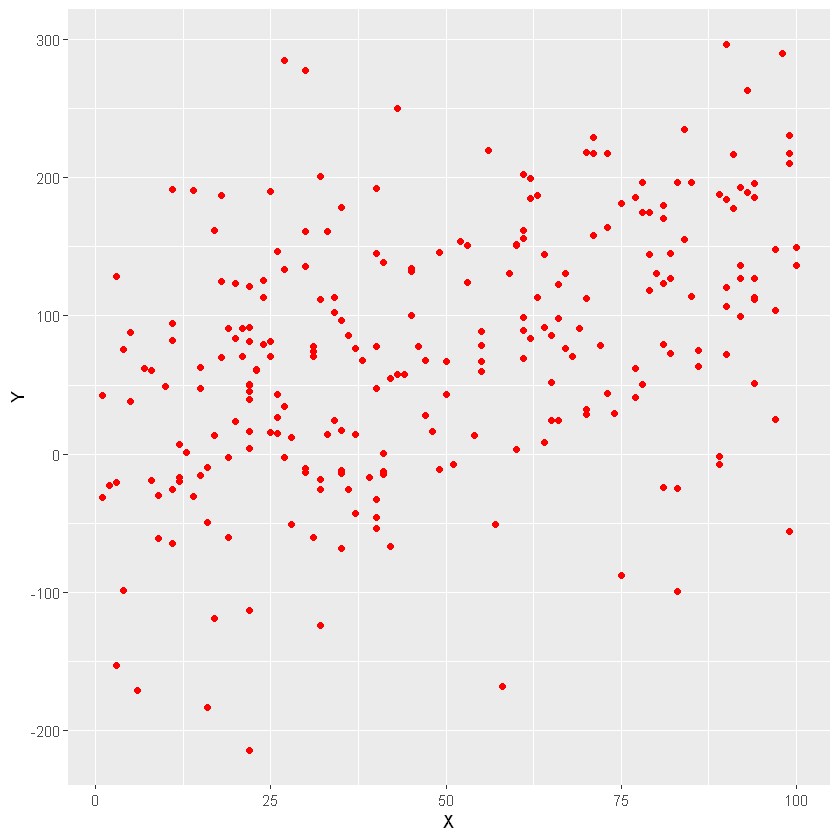

In [3]:
ggplot(df, aes(x=X,y=Y)) + geom_point(color="red")

In [4]:
fit <- lm(Y~X,df)
summary(fit)


Call:
lm(formula = Y ~ X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-256.64  -48.85    0.74   57.46  240.06 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.7756    10.4833   0.646    0.519    
X             1.4144     0.1859   7.610  5.7e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 83.42 on 248 degrees of freedom
Multiple R-squared:  0.1893,	Adjusted R-squared:  0.186 
F-statistic: 57.91 on 1 and 248 DF,  p-value: 5.704e-13


The summary of our fit includes estimates of our coefficients. Let's see if they accurately estimate our parameters.  

In [5]:
confint(fit)

,2.5 %,97.5 %
(Intercept),-13.871984,27.42320
X,1.048376,1.78052


Both confidence intervals capture our true parameters, but with a high margin of error!

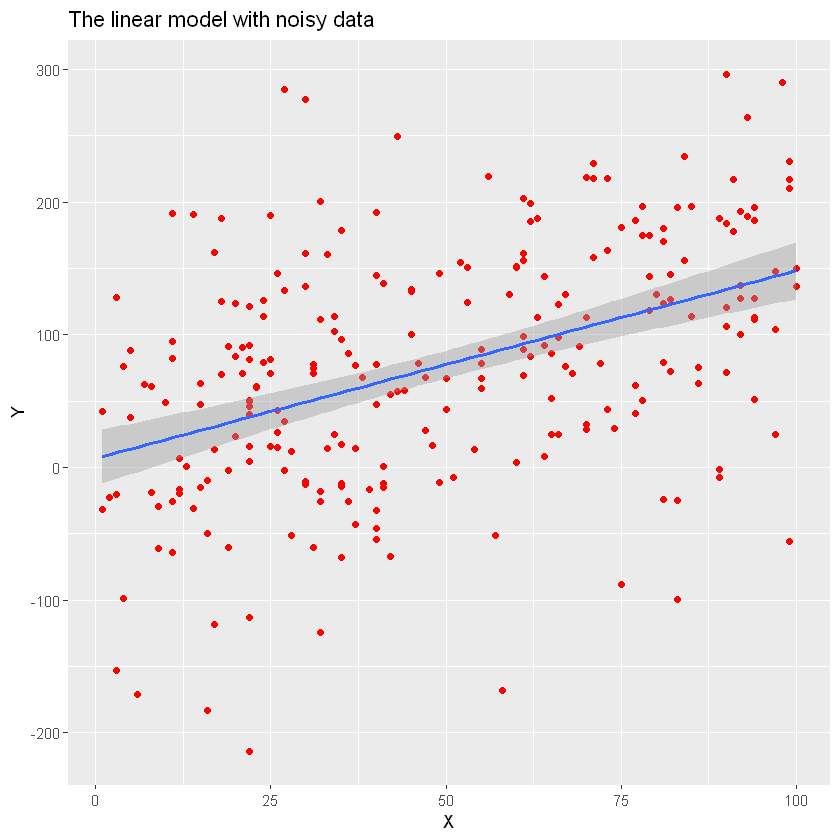

In [6]:
ggplot(df,aes(x=X,y=Y)) +
    geom_point(color="red") +
    ggtitle("The linear model with noisy data") + 
    geom_smooth(method='lm', formula= y~x)

What if the data was not as noisy? Let's consider and $\epsilon$ with constant variance of 144

In [7]:
myX <- sample(seq(1,100),size = 250, replace = T) # 250 random X's
myY <- 8 + 1.4*myX + rnorm(250,0,12)  # sd = 12
df <- data.frame(X=myX,Y=myY)

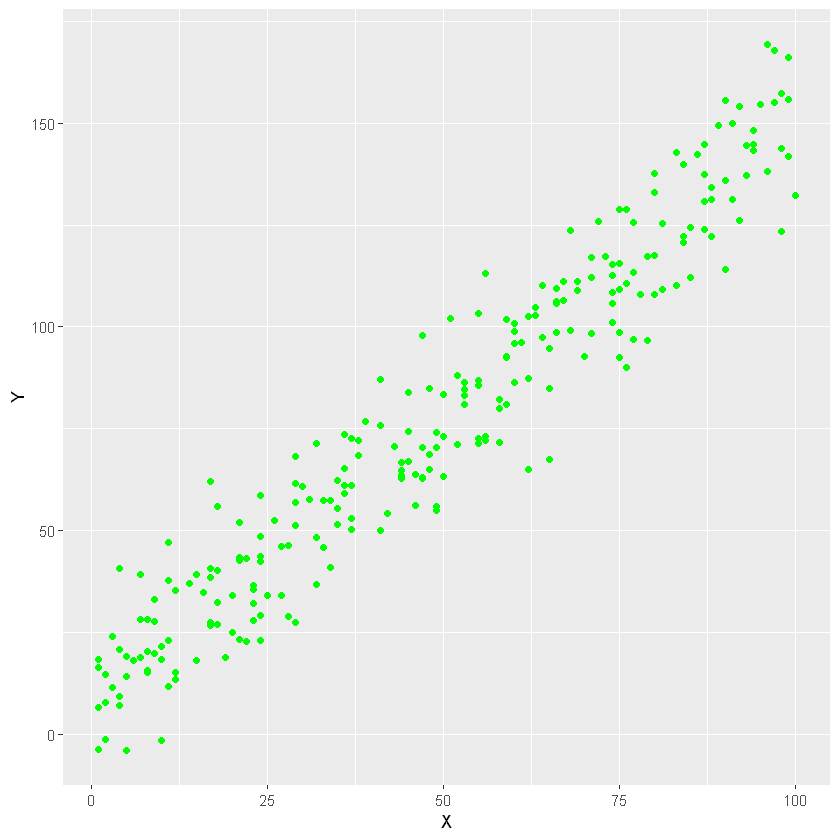

In [8]:
ggplot(df, aes(x=X,y=Y)) + geom_point(color="green")

Clearly, this is a more deterministic relationship than the red plot.

In [9]:
fit <- lm(Y~X,df)
summary(fit)


Call:
lm(formula = Y ~ X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.075  -8.185   0.369   8.031  29.992 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.04739    1.45292   5.539 7.76e-08 ***
X            1.40770    0.02573  54.721  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.7 on 248 degrees of freedom
Multiple R-squared:  0.9235,	Adjusted R-squared:  0.9232 
F-statistic:  2994 on 1 and 248 DF,  p-value: < 2.2e-16


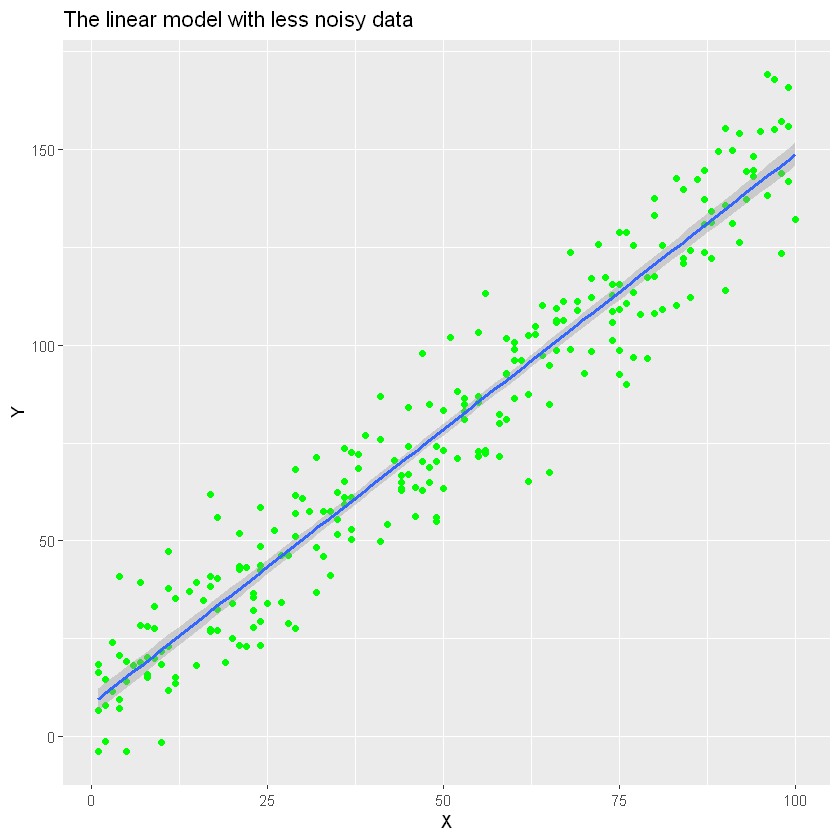

In [10]:
ggplot(df,aes(x=X,y=Y)) +
    geom_point(color="green") +
    ggtitle("The linear model with less noisy data") + 
    geom_smooth(method='lm', formula= y~x)

In [11]:
confint(fit)

,2.5 %,97.5 %
(Intercept),5.185755,10.909017
X,1.357036,1.458371


We now see that our model captures the true parameter values $\beta_0 = 8, \; \beta_1 = 1.4$ in the confidence interval!

This model meets the assumptions of the NTGM Model, as expected.

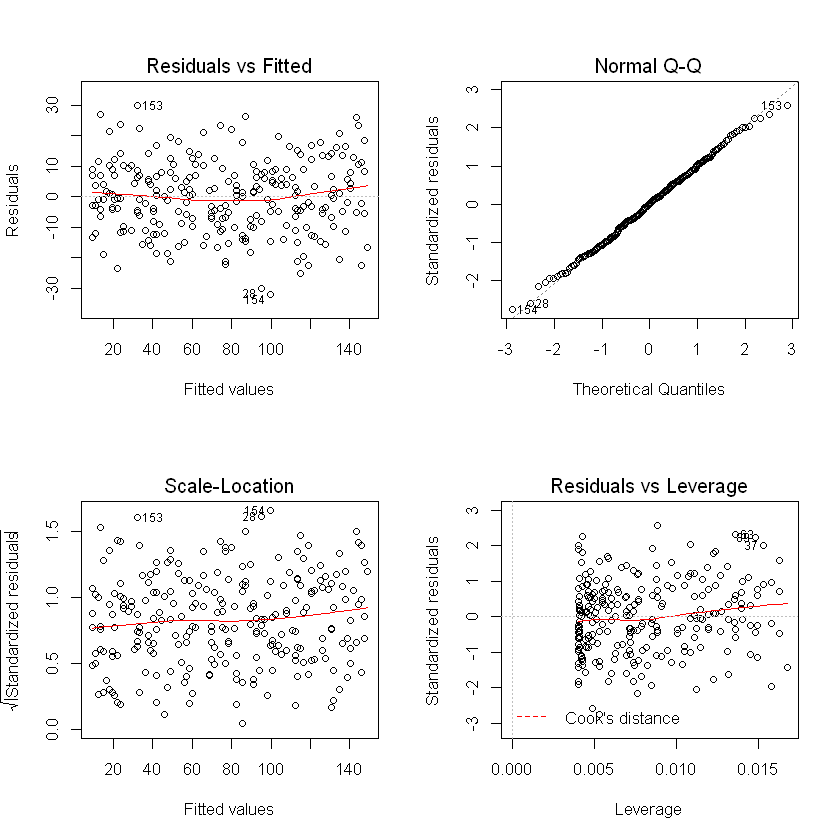

In [12]:
par(mfrow=c(2,2))
plot(fit)

Next time, I will do another simulation study showing properties of the general linear model.